In [5]:
import pandas as pd

In [1]:
  
# Create function to unzip a zipfile into current working directory 
# (since we're going to be downloading and unzipping a few files)
import zipfile



def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [2]:
unzip_data('archive.zip')

In [6]:
data = pd.read_csv('bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [10]:
%pip install -U scikit-learn

  Using cached scikit_learn-1.4.2-cp39-cp39-win_amd64.whl (10.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scipy-1.13.0-cp39-cp39-win_amd64.whl (46.2 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hatim\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


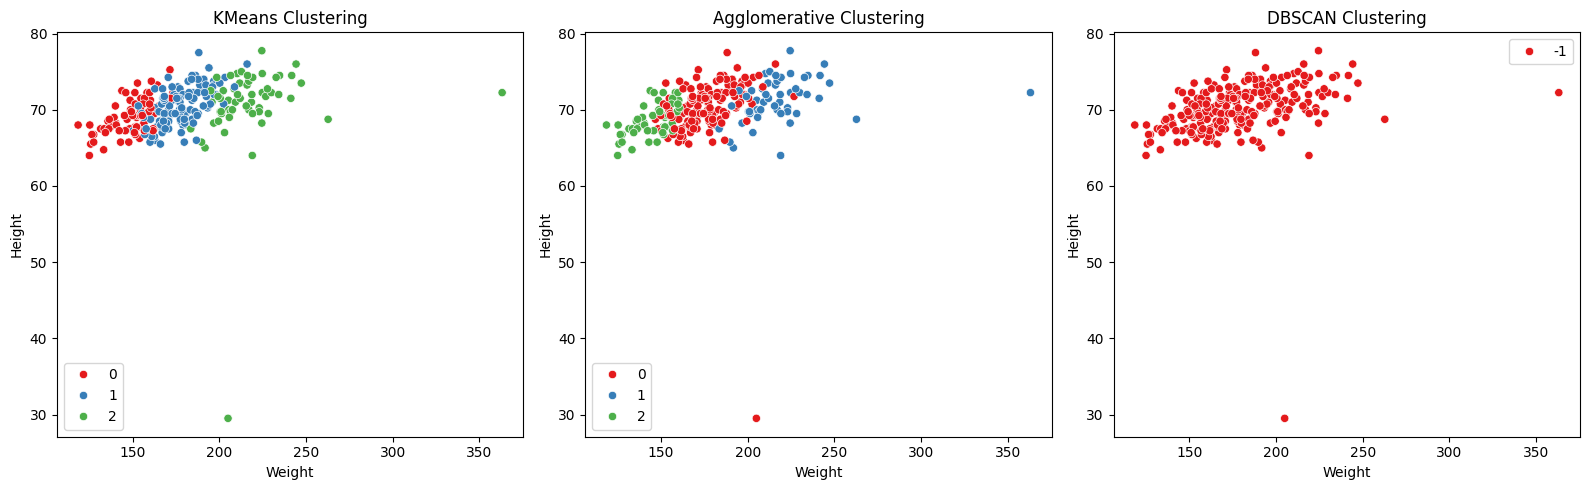

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Clustering algorithms
kmeans = KMeans(n_clusters=3)
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit clustering algorithms
kmeans_labels = kmeans.fit_predict(scaled_data)
agglomerative_labels = agglomerative.fit_predict(scaled_data)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Plotting
plt.figure(figsize=(16, 5))

# KMeans
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Weight', y='Height', hue=kmeans_labels, palette='Set1', legend='full')
plt.title('KMeans Clustering')

# Agglomerative Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Weight', y='Height', hue=agglomerative_labels, palette='Set1', legend='full')
plt.title('Agglomerative Clustering')

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Weight', y='Height', hue=dbscan_labels, palette='Set1', legend='full')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()